In [1]:
### importing the libraries ### 

import numpy as np 
import pandas as pd 

import re
import string
import numpy as np

import matplotlib.pyplot as plt 
from nltk.probability import FreqDist
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 

from tqdm.autonotebook import tqdm 

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning) 

from sklearn.model_selection import train_test_split 

/var/folders/yw/8ryzdwg9003dz4bx8ffhh25r0000gn/T/ipykernel_68734/584545937.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
df = pd.read_csv("~/Desktop/rumor_dataset.csv",header='infer') 
df.head()

,Index,Veracity,Text,Sentiment
0,3,F,The lie that coronavirus came from a bat or a ...,3
1,4,F,The health experts had predicted the virus cou...,3
2,8,F,The Centers for Disease Control and Prevention...,3
3,10,U,Warm weather will kill coronavirus. U.S. Presi...,2
4,15,F,Using a hair dryer to breathe in hot air can c...,2


In [3]:
df.shape

(6149, 4)

In [4]:
### Checking null values ###  
df["Veracity"].isnull().sum()

0

In [5]:
df["Text"].isnull().sum()

0

In [6]:
#df.drop("Index", axis=1, inplace=True) 

In [7]:
#df.drop("Sentiment", axis=1, inplace=True) 

In [8]:
# encoding the labels 

df["Veracity"] = df.Veracity.map({"F":0, "T":1, "U":2}) 

In [9]:
df.replace([np.inf, -np.inf], 2) 
df.fillna(2, inplace=True)

In [10]:
df["Veracity"].describe()

count    6149.000000
mean        0.641080
std         0.798794
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Veracity, dtype: float64

In [11]:
df["Veracity"].isnull().sum()

0

In [12]:
### Vectorizing the text ###  

from sklearn.feature_extraction.text import CountVectorizer 

count_vector = CountVectorizer(lowercase=False) # we will use it in the model building  

In [13]:
### function for plotting the bar chart ### 

def bar_chart(col): 
    fake = df[df["Veracity"]==0][col].value_counts()  
    real = df[df["Veracity"]==1][col].value_counts() 
    uncertain = df[df["Veracity"]==2][col].value_counts() 
    
    df1 = pd.DataFrame([fake,real,uncertain]) 
    df1.index = ['fake','real','uncertain'] 
    df1.plot(kind="bar") 

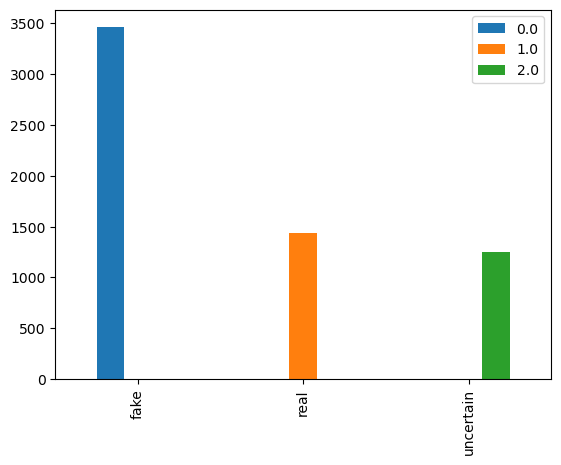

In [14]:
bar_chart("Veracity")

In [15]:
words =list( df['Text'].values)
stopwords=['ourselves', 'hers','the','of','and','in', 'between', 'yourself', 'but', 'again','of', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
split_words=[]
for word in words:
    lo_w=[]
    list_of_words=str(word).split()
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)
allwords = []
for wordlist in split_words:
    allwords += wordlist

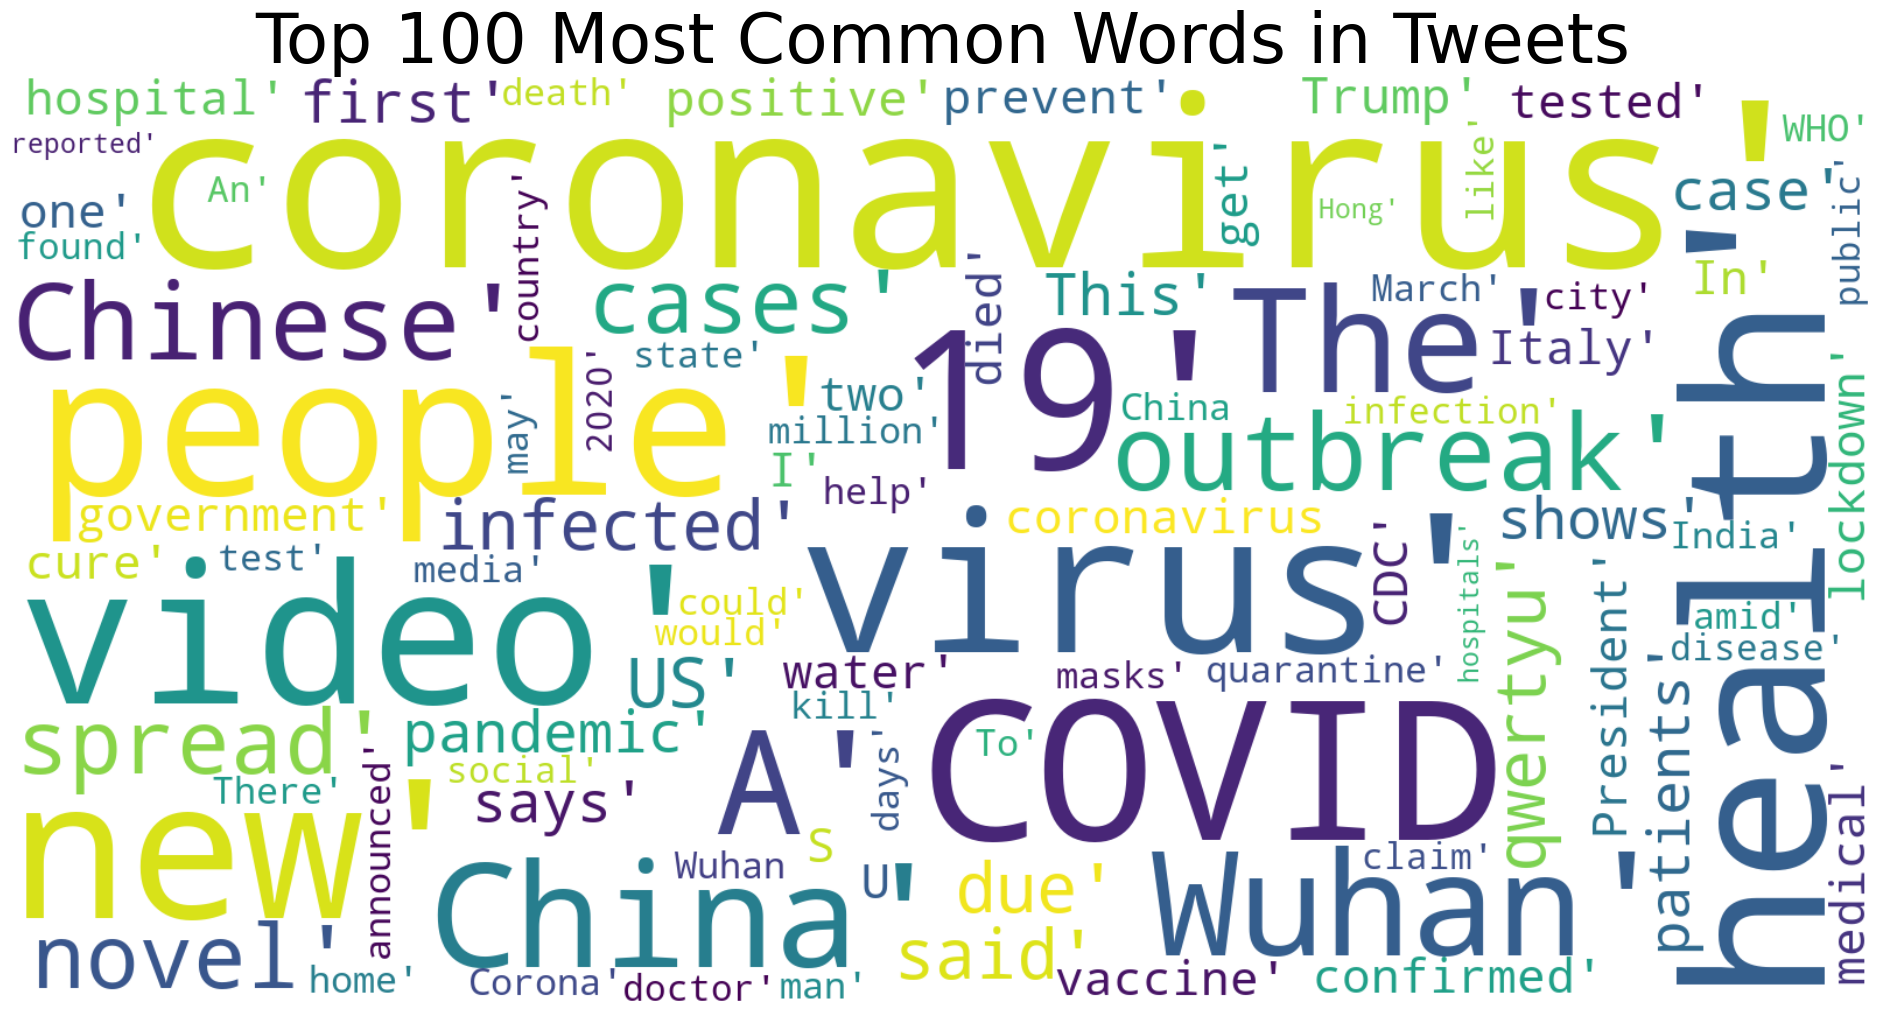

In [16]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Tweets', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [17]:
X = df["Text"].values
y = df["Veracity"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)  

In [18]:
training_data = count_vector.fit_transform(X_train)  
testing_data = count_vector.transform(X_test) 

In [19]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression(max_iter=1000) 
lr.fit(training_data, y_train) 
pred = lr.predict(testing_data) 

In [20]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
    
svm_clf = SVC(gamma='auto') 
svm_clf.fit(training_data, y_train) 
pred1 = svm_clf.predict(testing_data) 

In [21]:
from sklearn.tree import DecisionTreeClassifier , export_graphviz 

dtc_clf = DecisionTreeClassifier(max_depth=6, random_state=42) 
dtc_clf.fit(training_data, y_train) 
pred2 = dtc_clf.predict(testing_data)

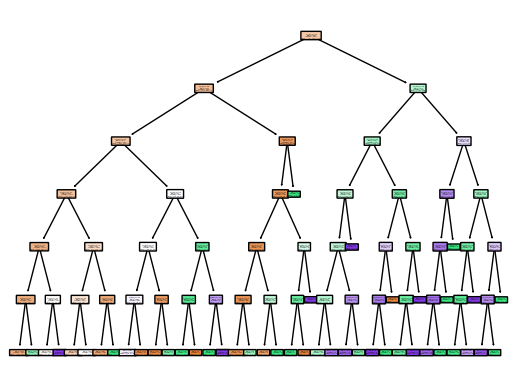

In [22]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtc_clf
                     ,
                     class_names =["fake","real","uncertain"] , filled = True ,  rounded = True)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(training_data, y_train)

pred3 = rnd_clf.predict(testing_data)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(training_data, y_train) 

pred4 = ada_clf.predict(testing_data) 

In [25]:
### Accuracy Scores ###  

from sklearn.metrics import accuracy_score 
acc1 = accuracy_score(pred,y_test) 
acc1

0.6910569105691057

In [26]:
from sklearn.metrics import accuracy_score 
acc2 = accuracy_score(pred1,y_test) 
acc2

0.5365853658536586

In [27]:
acc3 = accuracy_score(pred2,y_test) 
acc3

0.5934959349593496

In [28]:
acc4 = accuracy_score(pred3,y_test) 
acc4

0.5365853658536586

In [29]:
acc5 = accuracy_score(pred4,y_test) 
acc5

0.6325203252032521

In [30]:
# Read my data
df2 = pd.read_csv('~/Desktop/21_22_two_year_dataset/individualinf_repsonseeff_30K_interventions_21_22.csv')
df2.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,User,Date Created,Tweet,Likes,Followers,Friends,...,Processed Tweets,Date,Polarity,Subjectivity,Like Effect,Reply Effect,Retweet Effect,Individual Influence,Response Effect,Subjective Level
0,0,0,0,0,HSans,2022-12-30 23:42:46+00:00,"Here in #Québec, #Canada we've had this rule i...",0,2335,4527,...,weve rule place couple month like almost every...,2022-12-30,0.500000,0.500000,0,0,0,3,0.0,3
1,1,1,1,1,Randi_RLB,2022-12-30 23:11:27+00:00,"@DrAGrace_cyhtt ""Alberta's education minister ...",0,1531,2204,...,cyhtt alberta education minister intervene w m...,2022-12-30,-0.117262,0.577381,0,0,0,3,0.0,3
2,2,2,2,2,Golden_Pup,2022-12-30 22:51:45+00:00,November 18\n\nJust three days after defying a...,196,39775,584,...,november three day defying sanity pleading ont...,2022-12-30,0.000000,0.000000,3,1,2,4,2.0,1
3,3,3,3,3,EnigmaMachine8,2022-12-30 19:14:24+00:00,@shogun17761 @Katheri58113861 @kirkJK04 @jeanp...,0,2957,3137,...,youre trying convince person car take mask eve...,2022-12-30,0.000000,1.000000,0,0,0,3,0.0,4
4,4,4,4,4,Cognisant2000,2022-12-30 18:59:47+00:00,@GMMalliet Agree. We always wear a mask in enc...,0,2037,1713,...,agree always wear mask enclosed space one time...,2022-12-30,0.000000,0.000000,0,0,0,3,0.0,1


In [31]:
# Apply Logistic Regression Model to Our Tweets
my_text = df2["Processed Tweets"].astype(str).values
my_input = count_vector.transform(my_text) 
my_output = lr.predict(my_input) 

In [32]:
df2["Veracity"] = my_output
df2["Classify Misinformation"] = df2.Veracity.map({0:"M", 1:"C", 2:"U"}) 
df2.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,User,Date Created,Tweet,Likes,Followers,Friends,...,Polarity,Subjectivity,Like Effect,Reply Effect,Retweet Effect,Individual Influence,Response Effect,Subjective Level,Veracity,Classify Misinformation
0,0,0,0,0,HSans,2022-12-30 23:42:46+00:00,"Here in #Québec, #Canada we've had this rule i...",0,2335,4527,...,0.500000,0.500000,0,0,0,3,0.0,3,2.0,U
1,1,1,1,1,Randi_RLB,2022-12-30 23:11:27+00:00,"@DrAGrace_cyhtt ""Alberta's education minister ...",0,1531,2204,...,-0.117262,0.577381,0,0,0,3,0.0,3,1.0,C
2,2,2,2,2,Golden_Pup,2022-12-30 22:51:45+00:00,November 18\n\nJust three days after defying a...,196,39775,584,...,0.000000,0.000000,3,1,2,4,2.0,1,0.0,M
3,3,3,3,3,EnigmaMachine8,2022-12-30 19:14:24+00:00,@shogun17761 @Katheri58113861 @kirkJK04 @jeanp...,0,2957,3137,...,0.000000,1.000000,0,0,0,3,0.0,4,0.0,M
4,4,4,4,4,Cognisant2000,2022-12-30 18:59:47+00:00,@GMMalliet Agree. We always wear a mask in enc...,0,2037,1713,...,0.000000,0.000000,0,0,0,3,0.0,1,0.0,M


In [33]:
df2.to_csv('~/Desktop/21_22_two_year_dataset/classified_30K_interventions_21_22.csv')

In [34]:
# Function to determine sign of impact based on polarity of sentiment 
# We assume negative opinion on vaccine has a negative impact
def signofimpact(score):
    if score > 0:
        return 1
    else:
        return -1

# Function to check if the tweet contains hashtags that are hot topics
# Have a hashtag under a hot topic will increase visibility of the tweet
def ifhottopic(hashtags):
    match = ['COVID' , 'Toronto','Ottawa','cdnpoli','yyc','Vancouver','covid','Quebec','onpoli','Canada']
    if any(x in hashtags for x in match):
        return 1
    else:
        return 0

In [35]:
df2["Sign of Impact"] = df2["Polarity"].apply(signofimpact)
df2["Impact Value"] = df2["Individual Influence"]+df2["Response Effect"]+df2["Subjectivity"]+df2["Hashtags"].astype(str).apply(ifhottopic)
df2["Overall Impact"] = df2["Sign of Impact"]*df2["Impact Value"]
df2.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,User,Date Created,Tweet,Likes,Followers,Friends,...,Reply Effect,Retweet Effect,Individual Influence,Response Effect,Subjective Level,Veracity,Classify Misinformation,Sign of Impact,Impact Value,Overall Impact
0,0,0,0,0,HSans,2022-12-30 23:42:46+00:00,"Here in #Québec, #Canada we've had this rule i...",0,2335,4527,...,0,0,3,0.0,3,2.0,U,1,4.500000,4.500000
1,1,1,1,1,Randi_RLB,2022-12-30 23:11:27+00:00,"@DrAGrace_cyhtt ""Alberta's education minister ...",0,1531,2204,...,0,0,3,0.0,3,1.0,C,-1,3.577381,-3.577381
2,2,2,2,2,Golden_Pup,2022-12-30 22:51:45+00:00,November 18\n\nJust three days after defying a...,196,39775,584,...,1,2,4,2.0,1,0.0,M,-1,6.000000,-6.000000
3,3,3,3,3,EnigmaMachine8,2022-12-30 19:14:24+00:00,@shogun17761 @Katheri58113861 @kirkJK04 @jeanp...,0,2957,3137,...,0,0,3,0.0,4,0.0,M,-1,4.000000,-4.000000
4,4,4,4,4,Cognisant2000,2022-12-30 18:59:47+00:00,@GMMalliet Agree. We always wear a mask in enc...,0,2037,1713,...,0,0,3,0.0,1,0.0,M,-1,3.000000,-3.000000


In [36]:
df2.to_csv('~/Desktop/21_22_two_year_dataset/classified_impact_score_30K_interventions_21_22.csv')